# Load data

In [1]:
import pandas as pd

train_df = pd.read_csv("../data/splits/train.csv")
test_df = pd.read_csv("../data/splits/test.csv")

X_train = train_df["text"]
y_train = train_df["label"]

X_test = test_df["text"]
y_test = test_df["label"]


# Logistic regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

baseline_model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=1000, stop_words=None)),
    ("clf", LogisticRegression())
])

baseline_model.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('clf', LogisticRegression())])

Logistic Regression:

              precision    recall  f1-score   support

           0      0.939     0.953     0.946      5038
           1      0.930     0.910     0.920      3486

    accuracy                          0.935      8524
   macro avg      0.935     0.932     0.933      8524
weighted avg      0.935     0.935     0.935      8524



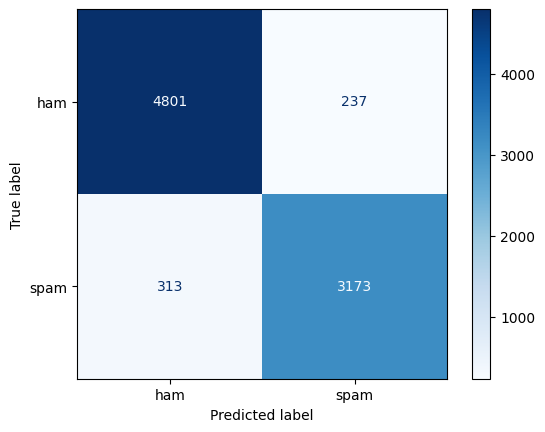

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = baseline_model.predict(X_test)

# Report
print("Logistic Regression:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["ham", "spam"], cmap="Blues")


In [4]:
import joblib
joblib.dump(baseline_model, "../models/logistic_model.pkl")

['../models/logistic_model.pkl']